## Global Historical Climatology Network Dataset
Variables are stored in both rows and columns
This dataset represents the daily weather records for a weather station (MX17004) in Mexico for five months in 2010.

In [1]:
import pandas as pd
import datetime as dt

In [2]:
weather = pd.read_csv('./weather-raw.csv')
weather.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
weather.drop_duplicates(inplace=True)
weather.dropna(axis=1, how='all', inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       22 non-null     object 
 1   year     22 non-null     int64  
 2   month    22 non-null     int64  
 3   element  22 non-null     object 
 4   d1       2 non-null      float64
 5   d2       4 non-null      float64
 6   d3       4 non-null      float64
 7   d4       2 non-null      float64
 8   d5       8 non-null      float64
 9   d6       2 non-null      float64
 10  d7       2 non-null      float64
 11  d8       2 non-null      float64
 12  d10      2 non-null      float64
 13  d11      2 non-null      float64
 14  d13      2 non-null      float64
 15  d14      4 non-null      float64
 16  d15      2 non-null      float64
 17  d16      2 non-null      float64
 18  d17      2 non-null      float64
 19  d23      4 non-null      float64
 20  d25      2 non-null      float64
 21  d26      2 non-nul

In [4]:
weather_melt = pd.melt(weather, id_vars=['id', 'year', 'month', 'element'], var_name='day', value_name='temp')
weather_melt

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
501,MX17004,2010,10,tmin,d31,NaN
502,MX17004,2010,11,tmax,d31,NaN
503,MX17004,2010,11,tmin,d31,NaN
504,MX17004,2010,12,tmax,d31,NaN


In [5]:
weather_melt = weather_melt[['id', 'year', 'month', 'day', 'element', 'temp']]
weather_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       506 non-null    object 
 1   year     506 non-null    int64  
 2   month    506 non-null    int64  
 3   day      506 non-null    object 
 4   element  506 non-null    object 
 5   temp     66 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 23.8+ KB


In [6]:
weather_melt['day'].replace(to_replace='d', value='', regex=True, inplace=True)
weather_melt['day'] = weather_melt['day'].astype('int')
weather_melt

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,id,year,month,day,element,temp
0,MX17004,2010,1,1,tmax,NaN
1,MX17004,2010,1,1,tmin,NaN
2,MX17004,2010,2,1,tmax,NaN
3,MX17004,2010,2,1,tmin,NaN
4,MX17004,2010,3,1,tmax,NaN
...,...,...,...,...,...,...
501,MX17004,2010,10,31,tmin,NaN
502,MX17004,2010,11,31,tmax,NaN
503,MX17004,2010,11,31,tmin,NaN
504,MX17004,2010,12,31,tmax,NaN


In [7]:
weather_2 = weather_melt.pivot_table(index=['id','year','month','day'], values='temp', columns='element').reset_index()
weather_2.head()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,30,27.8,14.5
1,MX17004,2010,2,2,27.3,14.4
2,MX17004,2010,2,3,24.1,14.4
3,MX17004,2010,2,11,29.7,13.4
4,MX17004,2010,2,23,29.9,10.7


In [8]:
weather_2['date'] = pd.to_datetime(weather_2.apply(lambda row: dt.date(row['year'], row['month'], row['day']), axis=1))

In [9]:
weather_2.drop(columns=['id', 'year', 'month', 'day'], inplace=True)
weather_2.set_index('date', inplace=True)

In [10]:
weather_2

element,tmax,tmin
date,,
2010-01-30,27.8,14.5
2010-02-02,27.3,14.4
2010-02-03,24.1,14.4
2010-02-11,29.7,13.4
2010-02-23,29.9,10.7
2010-03-05,32.1,14.2
2010-03-10,34.5,16.8
2010-03-16,31.1,17.6
2010-04-27,36.3,16.7


<AxesSubplot:xlabel='date'>

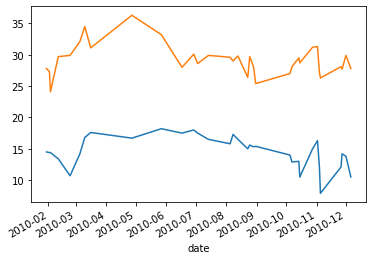

In [11]:
weather_2['tmin'].plot()
weather_2['tmax'].plot()